# 1. Install and Import Dependencies

In [2]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\aline/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-29 Python-3.13.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with image


In [8]:
img = 'https://images.pexels.com/photos/18867030/pexels-photo-18867030/free-photo-of-traffic-on-the-road.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2'

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)
model.to('cpu')  # ZORUNLU! hatayı buradan aldık 


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\aline/.cache\torch\hub\master.zip


YOLOv5  2025-5-29 Python-3.13.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [10]:
results = model(img)
results.print()

C:\Users\aline/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1500x2250 7 persons, 18 cars, 2 motorcycles, 2 buss, 2 trucks
Speed: 918.5ms pre-process, 83.7ms inference, 1.6ms NMS per image at shape (1, 3, 448, 640)


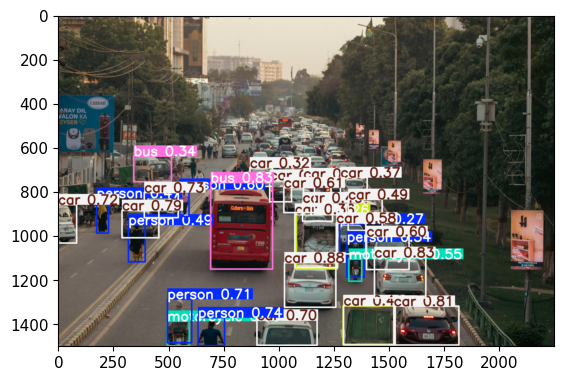

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
results.render()

[array([[[ 86,  66,  57],
         [ 83,  63,  54],
         [ 79,  59,  50],
         ...,
         [ 94,  78,  65],
         [152, 134, 122],
         [153, 135, 123]],
 
        [[ 91,  71,  62],
         [ 88,  68,  57],
         [ 85,  65,  56],
         ...,
         [ 88,  74,  61],
         [126, 112,  99],
         [124, 110,  97]],
 
        [[ 99,  77,  66],
         [ 97,  75,  62],
         [ 93,  71,  60],
         ...,
         [ 71,  63,  50],
         [ 90,  82,  69],
         [ 85,  77,  64]],
 
        ...,
 
        [[119, 101,  91],
         [126, 108,  96],
         [135, 117, 105],
         ...,
         [ 26,  40,  27],
         [ 25,  39,  26],
         [ 25,  39,  26]],
 
        [[129, 109, 102],
         [133, 113, 106],
         [138, 119, 112],
         ...,
         [ 24,  38,  25],
         [ 23,  37,  24],
         [ 23,  37,  24]],
 
        [[138, 117, 112],
         [140, 119, 114],
         [141, 122, 115],
         ...,
         [ 22,  36,  23],
  

# 4. Real Time Detections

In [18]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\aline/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  # Inference
C:\Users\aline/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  # Inference
C:\Users\aline/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  # Inference
C:\Users\aline/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  # Inference
C:\Users\aline/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is

KeyboardInterrupt: 

# 5. Train from scratch

In [13]:
import uuid   # Unique identifier
import os
import time

In [20]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [21]:
import os

BASE_PATH = 'dataset'
LABELS = ['awake', 'drowsy']
IMAGES_PER_LABEL = 50

# Her sınıf için klasör oluştur
for label in LABELS:
    path = os.path.join(BASE_PATH, label)
    os.makedirs(path, exist_ok=True)


In [22]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [23]:
import cv2
import uuid
import time

for label in LABELS:
    cap = cv2.VideoCapture(0)
    print(f'\nHazır mısın? "{label}" verisi toplanacak. Başlamak için 5 saniye bekleniyor...')
    time.sleep(5)
    
    for img_num in range(IMAGES_PER_LABEL):
        print(f'{label} verisi: Görsel {img_num+1}/{IMAGES_PER_LABEL}')
        
        ret, frame = cap.read()
        if not ret:
            print("Kamera okunamadı, çıkılıyor...")
            break
        
        filename = os.path.join(BASE_PATH, label, f'{label}_{uuid.uuid4()}.jpg')
        cv2.imwrite(filename, frame)
        
        cv2.imshow('Veri Toplama', frame)
        time.sleep(1.5)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



Hazır mısın? "awake" verisi toplanacak. Başlamak için 5 saniye bekleniyor...


KeyboardInterrupt: 

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

# Python kodu, her çalıştırıldığında benzersiz bir .jpg dosya yolu üretmek istiyor. Buna dikkat


data\images\awake.0a2deac1-3c07-11f0-9371-888888888788.jpg


In [23]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.cb6f26bc-2f14-11f0-b3fa-98597a481a10.jpg
data\images\awake.cb6f2848-2f14-11f0-8134-98597a481a10.jpg
data\images\awake.cb6f2973-2f14-11f0-a34f-98597a481a10.jpg
data\images\awake.cb6f2a36-2f14-11f0-ac6d-98597a481a10.jpg
data\images\awake.cb6f2baf-2f14-11f0-8184-98597a481a10.jpg
data\images\drowsy.cb6f2cd0-2f14-11f0-97ba-98597a481a10.jpg
data\images\drowsy.cb6f2de1-2f14-11f0-873e-98597a481a10.jpg
data\images\drowsy.cb6f2eed-2f14-11f0-892b-98597a481a10.jpg
data\images\drowsy.cb6f300a-2f14-11f0-acc8-98597a481a10.jpg
data\images\drowsy.cb6f30ba-2f14-11f0-a648-98597a481a10.jpg


In [14]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [21]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
!pip install torch torchvision torchaudio


  Using cached torchvision-0.22.0-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached torchaudio-2.7.0-cp313-cp313-win_amd64.whl.metadata (6.7 kB)
Using cached torchvision-0.22.0-cp313-cp313-win_amd64.whl (1.7 MB)
Using cached torchaudio-2.7.0-cp313-cp313-win_amd64.whl (2.5 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install torch==2.1.0+cu118 torchvision==0.16.0+cu118 torchaudio --index-url https://download.pytorch.org/whl/cu118 ## çalıştırmaaaaaa


Looking in indexes: https://download.pytorch.org/whl/cu118


ERROR: Could not find a version that satisfies the requirement torch==2.1.0+cu118 (from versions: 2.6.0+cu118, 2.7.0+cu118)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for torch==2.1.0+cu118


In [49]:
!pip install torch==2.7.0+cu118 torchvision==0.18.0+cu118 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.0%2Bcu118-cp313-cp313-win_amd64.whl.metadata (29 kB)


ERROR: Could not find a version that satisfies the requirement torchvision==0.18.0+cu118 (from versions: 0.1.6, 0.2.0, 0.21.0+cu118, 0.22.0+cu118)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for torchvision==0.18.0+cu118


In [53]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 2 --data dataset.yaml --weights yolov5s.pt --workers 2  --cache


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=2, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-418-ga493afe1 Python-3.13.2 torch-2.7.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0

yaklaşık 5 saat sonra torch inerken eksik inmiş bu yüzden ciddi hatalar aldım 


In [44]:
!python train.py --img 640 --batch 16 --epochs 10 \
--data dataset.yaml --weights yolov5s.pt --cache --noval


python: can't open file 'c:\\Users\\aline\\OneDrive\\Masaüstü\\Projelerim\\driver_drownise_detection_Program\\train.py': [Errno 2] No such file or directory


In [36]:
!cd labelImg && python labelImg.py


# 6. Load Custom Model

In [30]:
kontrol_et("yolov5/data/labels/train")
kontrol_et("yolov5/data/labels/val")


In [60]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\aline/.cache\torch\hub\master.zip


YOLOv5  2025-5-29 Python-3.13.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [79]:
img = r"C:\Users\aline\OneDrive\Masaüstü\Projelerim\driver_drownise_detection_Program\yolov5\data\images\train\awake_b4a2a8a9-eed9-4ec1-a325-182c1c53f27a.jpg"


In [80]:
results = model(img)

C:\Users\aline/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [81]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 4.1ms pre-process, 8.6ms inference, 41.3ms NMS per image at shape (1, 3, 480, 640)


In [ ]:
import plt 
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

NameError: name 'plt' is not defined

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined